# **Libraries**

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## **settings**

In [96]:
plt.style.use('default')

# **Decision Tree Regressor**

## **Node class**

In [97]:
class Node():
    def __init__(self, current_feature=None, threshold=None, left=None, right=None, information_gain=None, value=None):
        
        self.current_feature = current_feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.information_gain = information_gain
        
        self.value = value

## **Just Decision tree class**

In [98]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None

        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    
    def build_tree(self, data, current_depth=0):
        X, y = data[:, :-1], data[:, -1]

        num_samples, num_features = np.shape(X)
        best_split = {}

        if num_samples >= self.min_samples_split and current_depth <= self.max_depth:
            best_split = self.get_best_split(data, num_samples, num_features)
            
            if best_split != {}:
              if best_split["information_gain"] > 0:
                  left_subtree = self.build_tree(best_split['data_left'], current_depth + 1)
                  right_subtree = self.build_tree(best_split['data_right'], current_depth + 1)

                  return Node(best_split["current_feature"], best_split["threshold"], 
                              left_subtree, right_subtree, best_split["threshold"])
        
        leaf_value = np.mean(y)
        return Node(value=leaf_value)

    def get_best_split(self, data, num_samples, num_features):
        best_split = {}
        max_gain = -float("inf")

        for feature_index in range(num_features):
            feature_values = data[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:

                data_left, data_right = self.split(data, feature_index, threshold)
                if len(data_left) > 0 and len(data_right) > 0:
                    y, y_left, y_right = data[:, -1], data_left[:, -1], data_right[:, -1]
                    current_gain = self.compute_information_gain(y, y_left, y_right)
                    if current_gain > max_gain:
                        best_split["current_feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["data_left"] = data_left
                        best_split["data_right"] = data_right
                        best_split["information_gain"] = current_gain
                        max_gain = current_gain

        return best_split    


    def split(self, data, current_feature, threshold):
        data_left = np.array([row for row in data if row[current_feature] <= threshold])
        data_right = np.array([row for row in data if row[current_feature] > threshold])
        return data_left, data_right

    def compute_information_gain(self, parent, left_child, right_child):
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)

        parent = self.MSE(parent)
        left_child = self.MSE(left_child)
        right_child = self.MSE(right_child)
        inf_gain = parent - weight_left * left_child - weight_right * right_child

        return inf_gain
        
    def MSE(self, y):
        average_y = y.mean()
        sum = 0
        for i in range(len(y)):
            sum += (y[i] - average_y) ** 2 / len(y)
        
        return sum

    def fit(self, X, y):
        data = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(data)

    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        feature_val = x[tree.current_feature]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

# **Functions**

In [99]:
def to_np_array(array):
    return np.array(array)

def give_samples(n, a, b):
    X = []
    y = []
    for i in range(n):
        x = np.random.uniform(a, b)
        X.append([x])
        y.append([x * np.sin(x)])

    return X, y

def give_samples_with_noise(n, a, b):
    X = []
    y = []
    for i in range(n):
        x = np.random.uniform(a, b)
        X.append([x])
        y.append([x * np.sin(x) + np.random.normal(0, 2)])

    return X, y

def to_array(array, n):
    arr = []
    for i in range(n):
        arr.append(array[i][0])
    return arr

def ndarray_sort(array, n):
    arr = to_array(array, n)
    array = []
    arr = np.sort(arr)
    for i in range(n):
        array.append([arr[i]])
    return array

def ndarray(array, n):
    arr = []
    for i in range(n):
        arr.append([array[i]])
    return arr

def randomShuffle(X, y):
    X_shuffle = []
    y_shuffle = []
    for i in range(35):
        rnd = np.random.randint(0, 500)
        X_shuffle.append(X[rnd])
        y_shuffle.append(y[rnd])
    return X_shuffle, y_shuffle

# **Gradient Boosting Machine**

In [100]:
class GradientBoostingRegressor():
    def __init__(self, iterations=100, depth=2, learning_rate=0.1,
                 min_data_on_leaf=2, silence='False'):
        self.iterations = iterations
        self.depth = depth
        self.learning_rate = learning_rate
        self.min_data_on_leaf = min_data_on_leaf
        self.silence = silence

        self.Regressor = DecisionTreeRegressor(min_samples_split=min_data_on_leaf, max_depth=depth)



    def fit(self, X_train, y_train):
        n = len(X_train)

        average = 0
        for i in range(n):
            average += y_train[i]
        average = average / n

        predictions = [0] * n 
        y_predict = [average] * n

        for i in range(self.iterations):

            if self.silence == 'True':
                plt.plot(X_real, y_real, label='True function')
                plt.scatter(X_train, y_predict, label='mediumorchid')
                plt.legend()
                plt.show()

            grad = (-2) * (y_train - y_predict)
            grad = ndarray(grad, n)
            X_train = ndarray(X_train, n)
            self.Regressor.fit(X_train, grad)
            predictions = self.Regressor.predict(X_train)
            for i in range(n):
                y_predict[i] -= self.learning_rate * predictions[i]
            X_train = to_array(X_train, n)

        X_train = ndarray(X_train, n)
        y_predict = ndarray(y_predict, n)
        self.Regressor.fit(X_train, y_predict)
    
    def predict(self, X_test):
        X_test = ndarray(X_test, len(X_test))
        y_predict = self.Regressor.predict(X_test)
        return y_predict


      



## **model**

In [101]:
Regressor = GradientBoostingRegressor(
    iterations=300, depth=7, learning_rate=0.5, min_data_on_leaf=3, 
    silence='False'
)

## **Data**

In [102]:
n = 500
X_test, y_test = give_samples(n, -10, 10)
X_train, y_train = give_samples(n - 300, -10, 10)

X_test = to_array(X_test, n)
y_test = to_array(y_test, n)
X_train = to_array(X_train, n - 300)
y_train = to_array(y_train, n - 300)

data_test = pd.DataFrame({'X': X_test, 'y': y_test})
data_test = data_test.sort_values(by='X')

data_train = pd.DataFrame({'X': X_train, 'y': y_train})
data_train = data_train.sort_values(by='X')

X_test = data_test['X']
y_test = data_test['y']
X_train = data_train['X']
y_train = data_train['y']

X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_train = np.array(y_train)

## **Model Fit**

In [103]:
Regressor.fit(X_train, y_train)

### **Fiting animation**

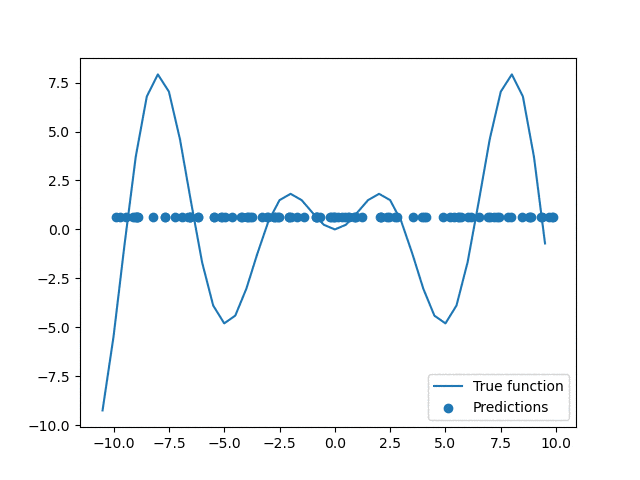

## **Predictions**

In [104]:
y_pred = Regressor.predict(X_test)

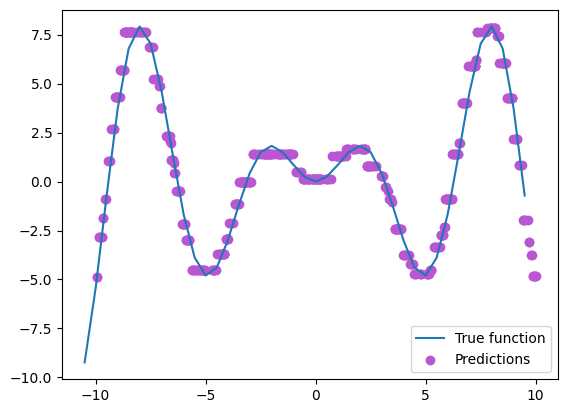

In [107]:
X_real = []
y_real = []
for i in range(-10, 10, 1):
    X_real.append(i - 0.5)
    X_real.append(i)
    X_real.append(i + 0.5)

    y_real.append((i - 0.5) * np.sin(i - 0.5))
    y_real.append(i * np.sin(i))
    y_real.append((i + 0.5) * np.sin(i + 0.5))

plt.plot(X_real, y_real, label='True function')
plt.scatter(X_test, y_pred, label='Predictions', color='mediumorchid')
plt.legend()
plt.show()